## 모델 저장과 복원
- 방법 1) 모델 전체 저장(모델 구조 + 가중치 + 변수)
    * save_model()
    * 복원시 추가 작업 필요없이 모델 파일을 로딩해서 사용 가능
    
- 방법 2) 가중치만 저장
    * save_weights()
    * 복원 시 모델 구조(Architechure) 생성한 후 가중치 적용

- 방법 3) 모델 전체, 가중치 자동 저장
    * fit()에서 ModelCheckPoint Event에 대한 callback 등록
    * save_best_only = True : 모니터링 기준에 따라서 좋은 성능의 모델만 저장
    * save_weight_only = True : 가중치만 저장

- 파일 또는 폴더
    * 파일 확장자가 없으면 폴더로 저장
    * 파일 확장자
        - h5 / hdf5 : HDF5 포맷으로 모델 또는 가중치를 저장
        - ckpf : 체크파일 형태로 저장
        - pd : 모델 저장

In [1]:
from sklearn.datasets import load_iris
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed, plot_model
import numpy as np

## [1] 데이터 준비 및 로딩

In [2]:
iris = load_iris()

In [3]:
x_train = iris.data
y_train = iris.target

print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')

x_train.shape : (150, 4), y_train.shape : (150,)


In [4]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [5]:
# Feature => 꽃잎의 길이, 너비
x_train = x_train[:, 2:]
x_train.shape

(150, 2)

## [2] 데이터 전처리

In [6]:
# Target => 문자를 수치로
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [7]:
# 라벨 인코딩
lencoder=LabelEncoder()
y_train=lencoder.fit(y_train).transform(y_train)

In [8]:
# 원 핫 인코딩
OHE=OneHotEncoder()
y_train=OHE.fit_transform(y_train.reshape(-1, 1))

In [10]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [11]:
x_train.shape, y_train.shape, y_train[0]

((150, 2),
 (150, 3),
 <1x3 sparse matrix of type '<class 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Row format>)

In [12]:
type(x_train_scaled), type(y_train)

(numpy.ndarray, scipy.sparse.csr.csr_matrix)

In [13]:
y_train=y_train.toarray()

In [14]:
type(y_train), type(x_train_scaled)

(numpy.ndarray, numpy.ndarray)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_scaled, y_train,
                                                   stratify=y_train)

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

In [17]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_test.shape : {x_test.shape}')
print(f'x_val.shape : {x_val.shape}')

x_train.shape : (84, 2)
x_test.shape : (38, 2)
x_val.shape : (28, 2)


## [3] 모델 구성 및 생성
- 입력 데이터 : 2개 Feature
- 출력 데이터 : 3개 품종
- 학습 방법 : 분류 - 다중분류

In [18]:
irisModel=Sequential(name='irisModel')

In [19]:
irisModel.add(Dense(9, activation='relu', input_shape=(2,)))
irisModel.add(Dense(3, activation='softmax'))

irisModel.summary()

Model: "irisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 27        
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


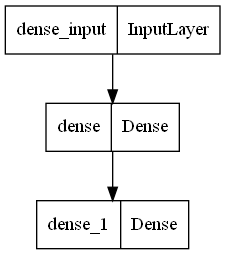

In [20]:
plot_model(irisModel)

In [21]:
## 모델 생성
irisModel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')

## [4] 모델 학습

In [33]:
irisModel.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
3/3 [==============================] - 0s 40ms/step - loss: 1.0100 - accuracy: 0.6071 - val_loss: 1.0051 - val_accuracy: 0.6786
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 1.0001 - accuracy: 0.6190 - val_loss: 0.9956 - val_accuracy: 0.7143
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 0.9900 - accuracy: 0.6548 - val_loss: 0.9868 - val_accuracy: 0.7143
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 0.9815 - accuracy: 0.6667 - val_loss: 0.9781 - val_accuracy: 0.7143
Epoch 5/10
3/3 [==============================] - 0s 12ms/step - loss: 0.9725 - accuracy: 0.6786 - val_loss: 0.9697 - val_accuracy: 0.7143
Epoch 6/10
3/3 [==============================] - 0s 16ms/step - loss: 0.9645 - accuracy: 0.6786 - val_loss: 0.9616 - val_accuracy: 0.7143
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 0.9560 - accuracy: 0.6786 - val_loss: 0.9538 - val_accuracy: 0.7143
Epoch 8/10
3/3 [===========

## [5-1] 평가

In [23]:
irisModel.evaluate(x_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 1.0097 - accuracy: 0.6053


[1.0097118616104126, 0.6052631735801697]

In [24]:
lossv, accv = irisModel.evaluate(x_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 1.0097 - accuracy: 0.6053


In [25]:
lossv, accv

(1.0097118616104126, 0.6052631735801697)

## [5-2] 모델 저장

In [26]:
# 모델 저장
from tensorflow.keras.models import save_model

In [27]:
MODEL_FILE = 'irisModel.h5'
WEIGHT_FILE = 'irisWeight'

In [28]:
if accv >= 0.98:
    save_model(irisModel, MODEL_FILE)
    irisModel.save_weights(WEIGHT_FILE)

## [6] 모델 복원
- 모델 또는 가중치 복원
- load_model(모델 파일 또는 모델 폴더명)
- Sequential.load_weights(가중치 파일 또는 폴더명)

#### [6-1] 모델 복원

In [29]:
from tensorflow.keras.models import load_model

In [30]:
reModel=load_model(MODEL_FILE)

OSError: No file or directory found at irisModel.h5

In [31]:
reModel.evaluate(x_test, y_test)

NameError: name 'reModel' is not defined

#### [6-2] 가중치 복원
- 모델 구조 구성 및 생성
- 가중치 로딩

In [32]:
# 모델 구조 구성
newModel=Sequential(name='NewIrisModel')
irisModel.add(Dense(9, activation='relu', input_shape=(2,)))
irisModel.add(Dense(3, activation='softmax'))

irisModel.summary()

Model: "irisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 27        
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
 dense_2 (Dense)             (None, 9)                 36        
                                                                 
 dense_3 (Dense)             (None, 3)                 30        
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 생성
irisModel.compile(loss='categoricl_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')

In [ ]:
# 가중치 로딩
newModel.load_weights(WEIGHT_FILE)

In [ ]:
newModel.evaluate(x_test, y_test)